In [85]:
# Common imports
import numpy as np
from numpy import sqrt 
import pandas as pd
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import pylab
import plotly.express as ex
import plotly.graph_objs as go
import plotly.figure_factory as ff
from plotly.subplots import make_subplots
from sklearn.impute import SimpleImputer
from statsmodels.multivariate.pca import PCA

In [86]:
import numpy as np 
import pandas as pd
df = pd.read_csv('/Users/abhisaurav/Desktop/Bank.csv',encoding= 'unicode_escape')
df

,Firm,NWP (£m),SCR (£m),EoF for SCR (£m),SCR coverage ratio,GWP (£m),Total assets (£m),Total liabilities (£m),Excess of assets over liabilities (£m) [= equity],Gross claims incurred (£m),"Gross BEL (inc. TPs as whole, pre-TMTP) (£m)",Unnamed: 11,Pure net claims ratio,Unnamed: 13,Net combined ratio,Pure gross claims ratio,Gross expense ratio,Gross combined ratio
0,Firm 2,19.880000,12.460000,41.970000,5.710000,16.030000,51.980000,11.000000,22.620000,21.610000,109.380000,105.760000,0.100000,0.590000,0.830000,0.09,0.440000,0.920000
1,Firm 3,35.760000,410.520000,600.030000,1.130000,78.580000,1020.890000,726.810000,346.850000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,0.000000
2,Firm 4,29111.980000,16203.870000,25382.320000,1.560000,42837.100000,79526.040000,66461.050000,16335.860000,43.850000,48.330000,50.410000,0.180000,0.080000,0.950000,-1.04,-0.060000,0.760000
3,Firm 5,71.990000,45.990000,167.880000,3.120000,48.350000,186.390000,96.560000,115.000000,269.180000,359.640000,386.530000,0.970000,0.170000,1.220000,0.89,0.270000,1.240000
4,Firm 6,3137.540000,4705.180000,4517.520000,1.300000,3780.160000,65396.890000,38862.450000,4990.760000,294.480000,527.980000,678.050000,0.620000,0.270000,0.680000,0.27,0.230000,0.550000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
235,Firm 319,0.000515,0.087200,3.788874,30.894049,0.000393,4.340647,0.332708,4.546017,12.632741,19.751352,20.547512,0.681734,0.277753,0.973482,0.97,0.314652,0.628600
236,Firm 321,4.855652,63.010298,81.369071,6.169212,15.810911,2652.283426,2815.021649,41.730253,5.148679,0.619355,0.511999,0.496637,0.229962,0.596259,0.87,0.319361,1.006944
237,Firm 322,2935.647964,1258.474502,1221.750181,1.692352,1641.277935,5974.006170,5581.087596,2768.633500,107.450121,648.070287,104.873602,0.224810,0.924658,1.382454,0.57,0.506236,0.974532
238,Firm 324,24.060966,35.701622,49.416705,0.745409,101.384970,406.938357,306.741281,46.221204,4.994887,2.091381,0.914761,0.441964,0.332172,0.988765,0.86,0.330908,1.283248


In [175]:
df.drop(df.iloc[:, 0:1], inplace=True, axis=1)
df_X = df
df_X

,NWP (£m),SCR (£m),EoF for SCR (£m),SCR coverage ratio,GWP (£m),Total assets (£m),Total liabilities (£m),Excess of assets over liabilities (£m) [= equity],Gross claims incurred (£m),"Gross BEL (inc. TPs as whole, pre-TMTP) (£m)",Unnamed: 11,Pure net claims ratio,Unnamed: 13,Net combined ratio,Pure gross claims ratio,Gross expense ratio,Gross combined ratio
0,19.880000,12.460000,41.970000,5.710000,16.030000,51.980000,11.000000,22.620000,21.610000,109.380000,105.760000,0.100000,0.590000,0.830000,0.09,0.440000,0.920000
1,35.760000,410.520000,600.030000,1.130000,78.580000,1020.890000,726.810000,346.850000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,0.000000
2,29111.980000,16203.870000,25382.320000,1.560000,42837.100000,79526.040000,66461.050000,16335.860000,43.850000,48.330000,50.410000,0.180000,0.080000,0.950000,-1.04,-0.060000,0.760000
3,71.990000,45.990000,167.880000,3.120000,48.350000,186.390000,96.560000,115.000000,269.180000,359.640000,386.530000,0.970000,0.170000,1.220000,0.89,0.270000,1.240000
4,3137.540000,4705.180000,4517.520000,1.300000,3780.160000,65396.890000,38862.450000,4990.760000,294.480000,527.980000,678.050000,0.620000,0.270000,0.680000,0.27,0.230000,0.550000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
235,0.000515,0.087200,3.788874,30.894049,0.000393,4.340647,0.332708,4.546017,12.632741,19.751352,20.547512,0.681734,0.277753,0.973482,0.97,0.314652,0.628600
236,4.855652,63.010298,81.369071,6.169212,15.810911,2652.283426,2815.021649,41.730253,5.148679,0.619355,0.511999,0.496637,0.229962,0.596259,0.87,0.319361,1.006944
237,2935.647964,1258.474502,1221.750181,1.692352,1641.277935,5974.006170,5581.087596,2768.633500,107.450121,648.070287,104.873602,0.224810,0.924658,1.382454,0.57,0.506236,0.974532
238,24.060966,35.701622,49.416705,0.745409,101.384970,406.938357,306.741281,46.221204,4.994887,2.091381,0.914761,0.441964,0.332172,0.988765,0.86,0.330908,1.283248


In [177]:
def plot_missing_values(df):
    """ For each column with missing values plot proportion that is missing."""
    data = [(col, df[col].isnull().sum() / len(df)) 
            for col in df.columns if df[col].isnull().sum() > 0]
    col_names = ['column', 'percent_missing']
    missing_df = pd.DataFrame(data, columns=col_names).sort_values('percent_missing')
    pylab.rcParams['figure.figsize'] = (15, 8)
    missing_df.plot(kind='barh', x='column', y='percent_missing'); 
    plt.title('Percent of missing values in colummns');

In [178]:
#plot_missing_values(df_X)

In [179]:
#plot_0_values(df_X)

array([[<AxesSubplot:title={'center':'NWP (£m)'}>,
        <AxesSubplot:title={'center':'SCR (£m)'}>,
        <AxesSubplot:title={'center':'EoF for SCR (£m)'}>,
        <AxesSubplot:title={'center':'SCR coverage ratio'}>],
       [<AxesSubplot:title={'center':'GWP (£m)'}>,
        <AxesSubplot:title={'center':'Total assets (£m)'}>,
        <AxesSubplot:title={'center':'Total liabilities (£m)'}>,
        <AxesSubplot:title={'center':'Excess of assets over liabilities (£m) [= equity]'}>],
       [<AxesSubplot:title={'center':'Gross claims incurred (£m)'}>,
        <AxesSubplot:title={'center':'Gross BEL (inc. TPs as whole, pre-TMTP) (£m)'}>,
        <AxesSubplot:title={'center':'Unnamed: 11'}>,
        <AxesSubplot:title={'center':'Pure net claims ratio'}>],
       [<AxesSubplot:title={'center':'Unnamed: 13'}>,
        <AxesSubplot:title={'center':'Net combined ratio'}>,
        <AxesSubplot:title={'center':'Pure gross claims ratio'}>,
        <AxesSubplot:title={'center':'Gross expense 

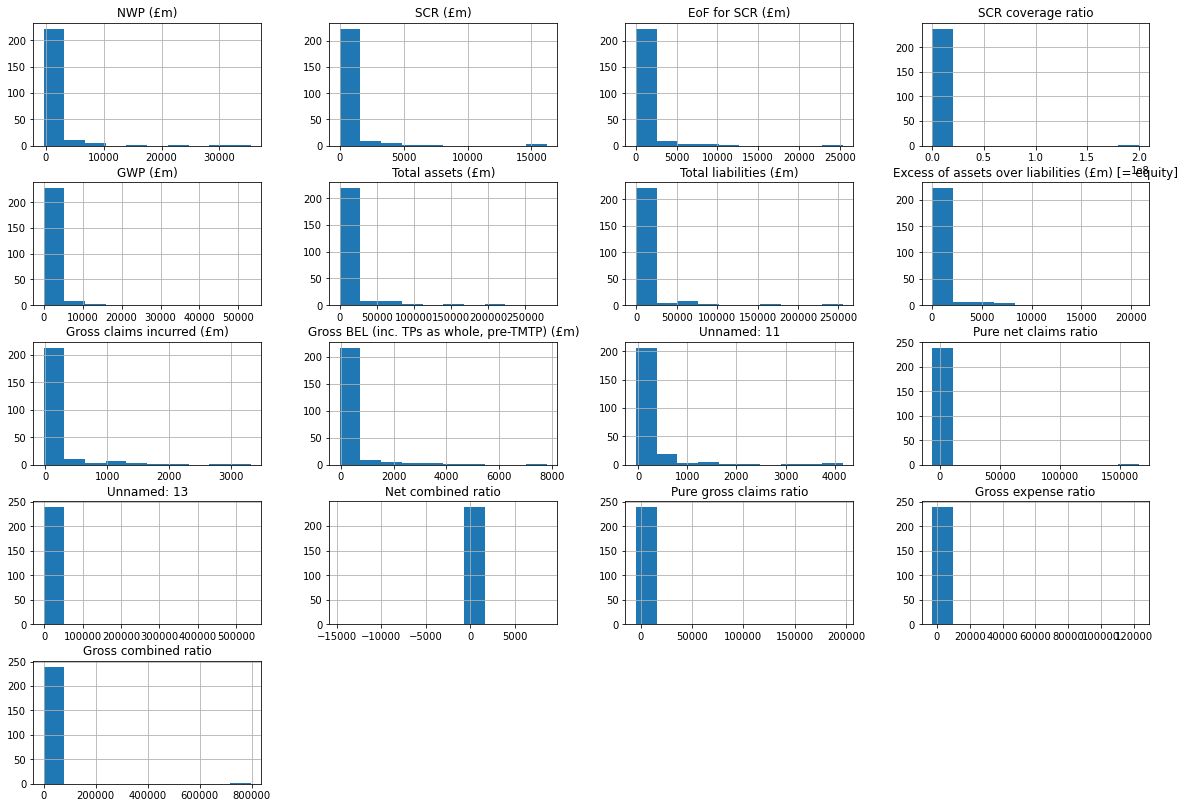

In [180]:
df_X.hist(bins=10, figsize=(20, 14))

<AxesSubplot:>

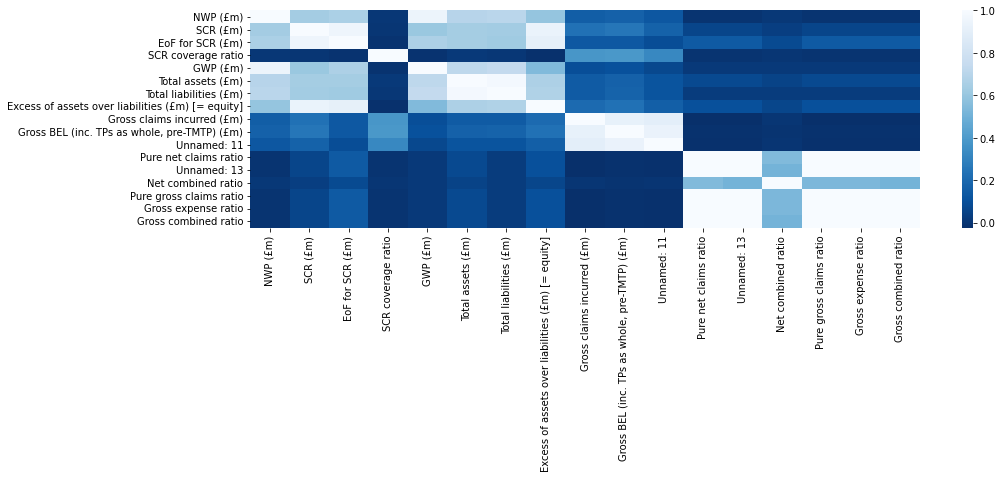

In [181]:
# Feature correlation
plt.figure(figsize=(15,4))
f_cor = df_X.corr()
sns.heatmap(f_cor, cmap="Blues_r")

In [96]:
# Libraries

from sklearn.preprocessing import StandardScaler
from statsmodels.multivariate.pca import PCA 
import seaborn as sns
import seaborn as sns
import matplotlib.pyplot as plt
import pylab
import plotly.express as ex
import plotly.graph_objs as go
import plotly.figure_factory as ff
from plotly.subplots import make_subplots
import xlsxwriter
%matplotlib inline

Standardise: Flag indicating to use standardized data with mean 0 and unit variance. standardized being True implies demean. Using standardized data is equivalent to computing principal components from the correlation matrix of data.

demean: Flag indicating whether to demean data before computing principal components. demean is ignored if standardize is True. Demeaning data but not standardizing is equivalent to computing principal components from the covariance matrix of data.

Method for missing data. Choices are:
‘fill-em’ - use EM algorithm to fill missing value. ncomp should be set to the number of factors required.
None raises if data contains NaN values.

In [102]:
# PCA with covariance matrix of data - Nipals

pc2 = PCA(df_X,
         ncomp=5,
         standardize=False,
         demean=True,
         normalize=True,
         gls=False,
         weights=None,
         method='nipals',
         missing='fill-em')

In [103]:
df_comp = pc2.loadings.T
df_comp
#df_comp.to_excel('/Users/abhisaurav/Desktop/loading.xlsx', sheet_name='loading', index=True)

,GWP (£m),Total assets (£m),Total liabilities (£m),Excess of assets over liabilities (£m) [= equity],Gross claims incurred (£m),"Gross BEL (inc. TPs as whole, pre-TMTP) (£m)",Unnamed: 11,Pure net claims ratio,Unnamed: 13,Net combined ratio,Pure gross claims ratio,Gross expense ratio,Gross combined ratio
comp_0,0.003810,0.062457,0.040502,0.004783,-0.000108,-0.000066,-0.000117,0.164996,0.535587,0.008706,0.196062,0.122617,0.791703
comp_1,0.077244,0.690534,0.714719,0.032642,0.001341,0.003615,0.001607,-0.011880,-0.039030,-0.000335,-0.014215,-0.008910,-0.057824
comp_2,-0.176901,0.716675,-0.673070,-0.041384,-0.000352,-0.008328,-0.000066,-0.002833,-0.009023,-0.000131,-0.003327,-0.001990,-0.013177
comp_3,0.979373,0.074879,-0.180474,0.048982,-0.002919,-0.014423,-0.005409,-0.000741,-0.000546,-0.001649,-0.000636,-0.000581,-0.000896
comp_4,-0.054141,0.003757,-0.043877,0.977461,0.067766,0.164534,0.089569,-0.000336,-0.002914,0.000741,-0.000108,0.000655,-0.001701


In [104]:
X2_factors = pc2.factors
X2_factors

,comp_0,comp_1,comp_2,comp_3,comp_4
0,-0.005156,-0.018398,-0.002688,-0.005039,-0.010781
1,-0.005066,-0.016739,-0.000151,-0.004590,-0.000937
2,0.002728,0.128993,0.050750,0.718645,0.410705
3,-0.005143,-0.018174,-0.002326,-0.004547,-0.004326
4,0.000528,0.083385,0.263116,0.030482,0.116924
...,...,...,...,...,...
235,-0.005160,-0.018457,-0.002992,-0.005363,-0.012295
236,-0.004880,-0.013125,-0.003004,-0.011121,-0.015496
237,-0.004542,-0.006897,-0.001488,0.017766,0.083827
238,-0.005121,-0.017755,-0.002149,-0.003853,-0.011600


In [105]:
correlation = X2_factors.corr()
correlation

,comp_0,comp_1,comp_2,comp_3,comp_4
comp_0,1.000000e+00,4.855841e-08,3.137317e-16,2.813577e-16,-2.058798e-16
comp_1,4.855841e-08,1.000000e+00,1.259099e-09,1.062530e-11,-2.187552e-14
comp_2,3.137317e-16,1.259099e-09,1.000000e+00,-3.663014e-08,-2.148097e-15
comp_3,2.813577e-16,1.062530e-11,-3.663014e-08,1.000000e+00,3.535812e-08
comp_4,-2.058798e-16,-2.187552e-14,-2.148097e-15,3.535812e-08,1.000000e+00


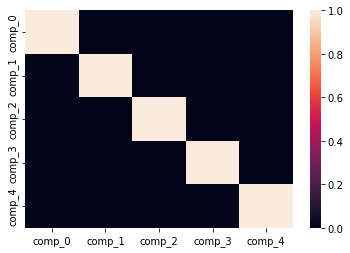

In [106]:
sns.heatmap(X2_factors.corr())
plt.show()

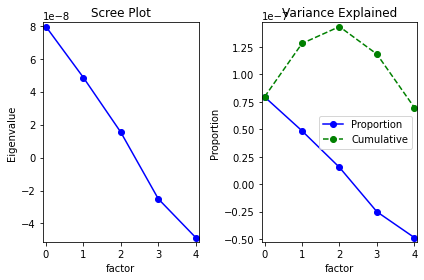

In [107]:
from statsmodels.multivariate.factor import Factor
model = Factor(X2_factors).fit()
model.plot_scree()
plt.show()

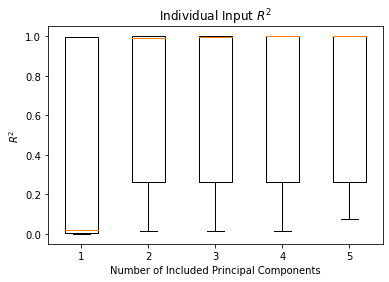

In [108]:

pc2.plot_rsquare()
plt.show()

In [109]:
pc2.project()
plt.show()

In [110]:
explained_variance=pc2.eigenvals
explained_variance

0    1.002982e+12
1    5.192927e+11
2    5.552387e+09
3    2.571285e+09
4    6.807007e+08
Name: eigenvals, dtype: float64

In [111]:
explained_variance_ratio = explained_variance/np.sum(explained_variance)
explained_variance_ratio

0    0.655082
1    0.339168
2    0.003626
3    0.001679
4    0.000445
Name: eigenvals, dtype: float64

[Text(0.5, 1.0, 'PVE vs. Principal Component'),
 Text(0.5, 0, 'Principal Component'),
 Text(0, 0.5, 'Proportion of Variance Explained')]

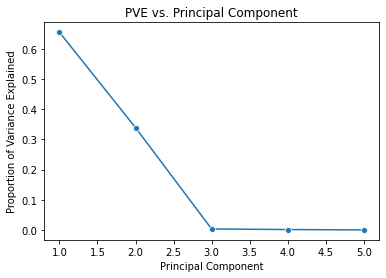

In [112]:
(sns
 .lineplot(x=np.arange(1, 6),
           y=explained_variance_ratio,
           marker="o")
 .set(title="PVE vs. Principal Component",
      xlabel="Principal Component",
      ylabel="Proportion of Variance Explained",))

[Text(0.5, 1.0, 'Cumulative PVE vs. Principal Component'),
 Text(0.5, 0, 'Principal Component'),
 Text(0, 0.5, 'Cumulative Proportion of Variance Explained')]

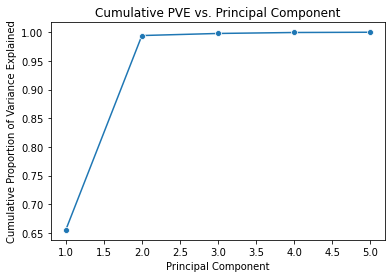

In [113]:
# Cumulative PVE vs. Principal Component plot
(sns
 .lineplot(x=np.arange(1, 6),
           y=np.cumsum(explained_variance_ratio),
           marker="o")
 .set(title="Cumulative PVE vs. Principal Component",
      xlabel="Principal Component",
      ylabel="Cumulative Proportion of Variance Explained"))

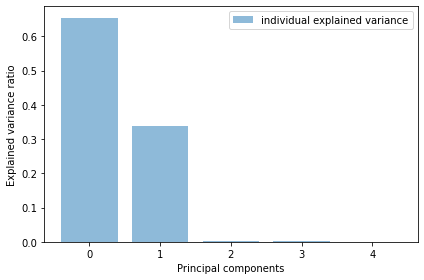

In [114]:
#with plt.style.context('dark_background'):
plt.figure(figsize=(6, 4))

plt.bar(range(5), explained_variance_ratio, alpha=0.5, align='center',
            label='individual explained variance')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal components')
plt.legend(loc='best')
plt.tight_layout()

In [81]:
mono_comm = pd.read_csv('/Users/abhisaurav/Desktop/Bank.csv',encoding= 'unicode_escape')

In [82]:
import numpy as np 
import pandas as pd
import plotly.express as px
# For plotting with matplotlib
import matplotlib.pyplot as plt
# For plotting with seaborn
import seaborn as sns  

In [115]:

pc = PCA(df_X,
         ncomp=2,
         standardize=False,
         demean=True,
         normalize=True,
         gls=False,
         weights=None,
         method='nipals',
         missing='fill-em')

In [117]:
X2_factors = pc.factors
X2_factors

,comp_0,comp_1
0,-0.005156,-0.018398
1,-0.005066,-0.016739
2,0.002728,0.128993
3,-0.005143,-0.018174
4,0.000528,0.083385
...,...,...
235,-0.005160,-0.018457
236,-0.004880,-0.013125
237,-0.004542,-0.006897
238,-0.005121,-0.017755


In [128]:
df = pd.read_csv('/Users/abhisaurav/Desktop/Bank.csv',encoding= 'unicode_escape')
df_pca=df.join(X2_factors)
df_pca.drop(df.iloc[:, 0:18], inplace=True, axis=1)
df_pca

,comp_0,comp_1
0,-0.005156,-0.018398
1,-0.005066,-0.016739
2,0.002728,0.128993
3,-0.005143,-0.018174
4,0.000528,0.083385
...,...,...
235,-0.005160,-0.018457
236,-0.004880,-0.013125
237,-0.004542,-0.006897
238,-0.005121,-0.017755


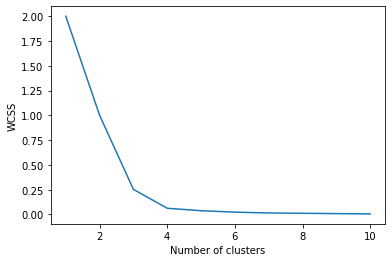

In [129]:
from sklearn.cluster import KMeans
wcss = []
for i in range(1,11):
   model = KMeans(n_clusters = i, init = "k-means++")
   model.fit(df_pca)
   wcss.append(model.inertia_)
plt.plot(range(1,11), wcss)
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [135]:
kmeans = KMeans(n_clusters=4, random_state=10) # We define the best number of clusters
clusters = kmeans.fit(df_pca[['comp_0','comp_1']]) #PC1 vs PC2 (normalized values)



In [136]:
kmeans.cluster_centers_

array([[-0.00496967, -0.01502221],
       [ 0.99653252, -0.05228322],
       [ 0.01567724,  0.37871908],
       [ 0.00179834,  0.11373814]])

In [137]:
df_pca['Cluster'] = pd.Series(clusters.labels_, index=df.index)

In [138]:
df_pca

,comp_0,comp_1,Cluster
0,-0.005156,-0.018398,0
1,-0.005066,-0.016739,0
2,0.002728,0.128993,3
3,-0.005143,-0.018174,0
4,0.000528,0.083385,3
...,...,...,...
235,-0.005160,-0.018457,0
236,-0.004880,-0.013125,0
237,-0.004542,-0.006897,0
238,-0.005121,-0.017755,0


In [140]:
df_cluster=df.join(df_pca)
df_cluster

,Firm,NWP (£m),SCR (£m),EoF for SCR (£m),SCR coverage ratio,GWP (£m),Total assets (£m),Total liabilities (£m),Excess of assets over liabilities (£m) [= equity],Gross claims incurred (£m),...,Unnamed: 11,Pure net claims ratio,Unnamed: 13,Net combined ratio,Pure gross claims ratio,Gross expense ratio,Gross combined ratio,comp_0,comp_1,Cluster
0,Firm 2,19.880000,12.460000,41.970000,5.710000,16.030000,51.980000,11.000000,22.620000,21.610000,...,105.760000,0.100000,0.590000,0.830000,0.09,0.440000,0.920000,-0.005156,-0.018398,0
1,Firm 3,35.760000,410.520000,600.030000,1.130000,78.580000,1020.890000,726.810000,346.850000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,-0.005066,-0.016739,0
2,Firm 4,29111.980000,16203.870000,25382.320000,1.560000,42837.100000,79526.040000,66461.050000,16335.860000,43.850000,...,50.410000,0.180000,0.080000,0.950000,-1.04,-0.060000,0.760000,0.002728,0.128993,3
3,Firm 5,71.990000,45.990000,167.880000,3.120000,48.350000,186.390000,96.560000,115.000000,269.180000,...,386.530000,0.970000,0.170000,1.220000,0.89,0.270000,1.240000,-0.005143,-0.018174,0
4,Firm 6,3137.540000,4705.180000,4517.520000,1.300000,3780.160000,65396.890000,38862.450000,4990.760000,294.480000,...,678.050000,0.620000,0.270000,0.680000,0.27,0.230000,0.550000,0.000528,0.083385,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
235,Firm 319,0.000515,0.087200,3.788874,30.894049,0.000393,4.340647,0.332708,4.546017,12.632741,...,20.547512,0.681734,0.277753,0.973482,0.97,0.314652,0.628600,-0.005160,-0.018457,0
236,Firm 321,4.855652,63.010298,81.369071,6.169212,15.810911,2652.283426,2815.021649,41.730253,5.148679,...,0.511999,0.496637,0.229962,0.596259,0.87,0.319361,1.006944,-0.004880,-0.013125,0
237,Firm 322,2935.647964,1258.474502,1221.750181,1.692352,1641.277935,5974.006170,5581.087596,2768.633500,107.450121,...,104.873602,0.224810,0.924658,1.382454,0.57,0.506236,0.974532,-0.004542,-0.006897,0
238,Firm 324,24.060966,35.701622,49.416705,0.745409,101.384970,406.938357,306.741281,46.221204,4.994887,...,0.914761,0.441964,0.332172,0.988765,0.86,0.330908,1.283248,-0.005121,-0.017755,0


<AxesSubplot:xlabel='Cluster', ylabel='Total assets (£m)'>

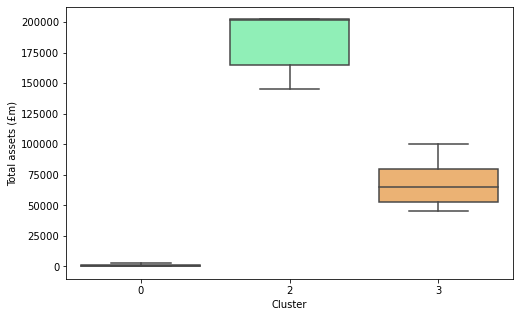

In [204]:
plt.figure(figsize=(8,5))
sns.boxplot(x='Cluster',y='Total assets (£m)',data=df_cluster, palette='rainbow',showfliers = False)


<AxesSubplot:xlabel='Cluster', ylabel='NWP (£m)'>

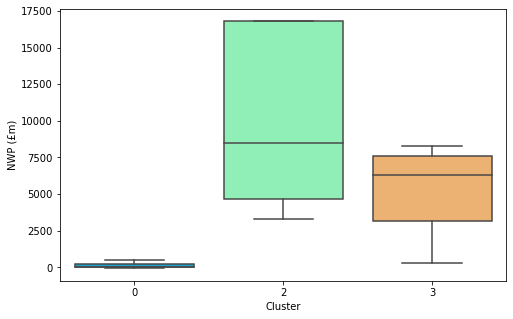

In [205]:
plt.figure(figsize=(8,5))
sns.boxplot(x='Cluster',y='NWP (£m)',data=df_cluster, palette='rainbow',showfliers = False)

<AxesSubplot:xlabel='Cluster', ylabel='GWP (£m)'>

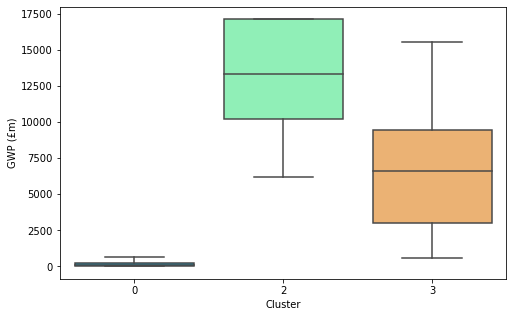

In [206]:
plt.figure(figsize=(8,5))
sns.boxplot(x='Cluster',y='GWP (£m)',data=df_cluster, palette='rainbow',showfliers = False)

<AxesSubplot:xlabel='Cluster', ylabel='SCR coverage ratio'>

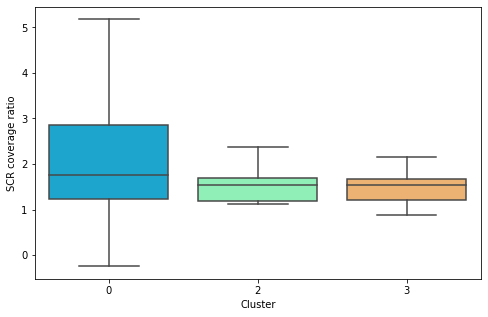

In [207]:
plt.figure(figsize=(8,5))
sns.boxplot(x='Cluster',y='SCR coverage ratio',data=df_cluster, palette='rainbow',showfliers = False)

<AxesSubplot:xlabel='Cluster', ylabel='Gross claims incurred (£m)'>

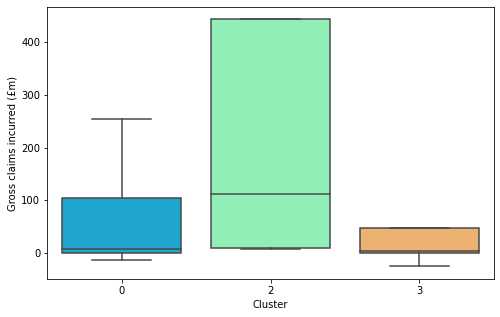

In [214]:
plt.figure(figsize=(8,5))
sns.boxplot(x='Cluster',y='Gross claims incurred (£m)',data=df_cluster, palette='rainbow',showfliers = False)

<AxesSubplot:xlabel='Cluster', ylabel='Net combined ratio'>

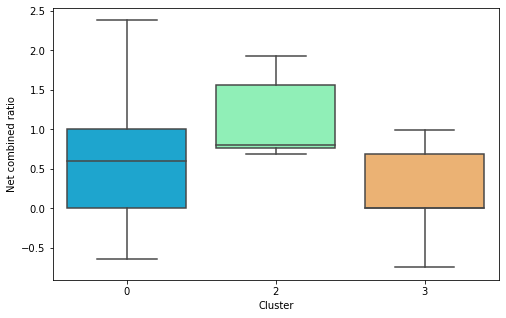

In [208]:
df_cluster = df_cluster[df_cluster['Net combined ratio'] < 8000]
plt.figure(figsize=(8,5))
sns.boxplot(x='Cluster',y='Net combined ratio',data=df_cluster, palette='rainbow',showfliers = False)

In [209]:
df_cluster.to_excel('/Users/abhisaurav/Desktop/Cluster.xlsx', sheet_name='Cluster', index=False)

In [210]:
df = pd.read_csv('/Users/abhisaurav/Desktop/Cluster.csv',encoding= 'unicode_escape')